In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set_style('darkgrid')
sns.set()
plt.style.use('ggplot')
import warnings
warnings.filterwarnings('ignore')

In [4]:
data = pd.read_csv('/content/train_u6lujuX_CVtuZ9i (1).csv')

In [5]:
print("Top 5 rows from the data: ")
data.head()

Top 5 rows from the data: 


,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [6]:
def data_feature(dataset):
    print("SHAPE OF THE DATA: ")
    print(dataset.shape)
    print("-"*90)
    print("INFORMATION OF THE DATA: ")
    print(dataset.info())
    print("-"*90)
    print("NUMBER OF NULL VALUES PRESENT IN THE DATA: ")
    print(dataset.isnull().sum())
    print("-"*90)
    print("COLUMN NAMES OF THE DATA: ")
    print(dataset.columns)
    print("-"*90)
    
data_feature(data)

SHAPE OF THE DATA: 
(614, 13)
------------------------------------------------------------------------------------------
INFORMATION OF THE DATA: 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1)

In [7]:
data.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [8]:
data['Loan_Status'].value_counts()

Y    422
N    192
Name: Loan_Status, dtype: int64

In [9]:
data['Loan_Status'].value_counts(normalize=True)

Y    0.687296
N    0.312704
Name: Loan_Status, dtype: float64

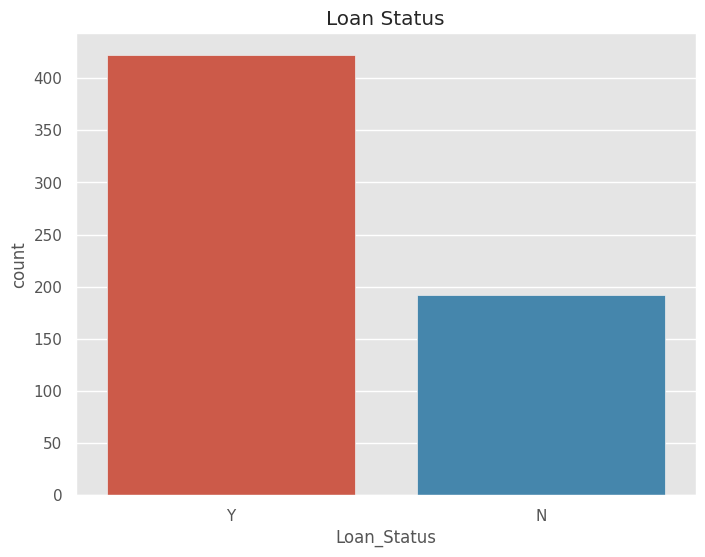

In [10]:
plt.figure(figsize=(8,6))
sns.countplot(x='Loan_Status', data=data)
plt.title('Loan Status')
plt.show()

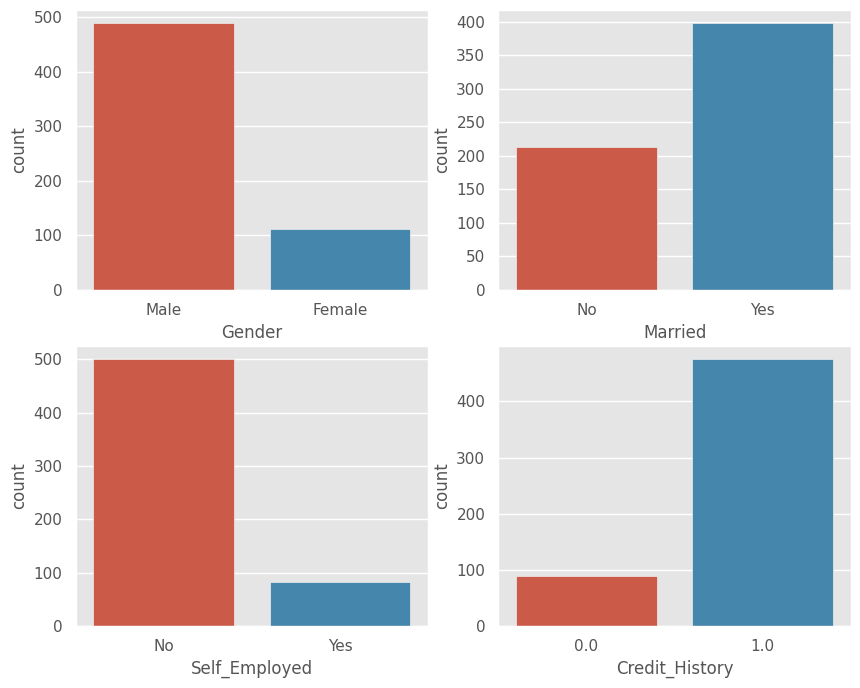

In [11]:

plt.figure(figsize=(10,8))
plt.subplot(221)
sns.countplot(x='Gender',data=data)
# plt.title('Gender')
plt.subplot(222)
sns.countplot(x='Married',data=data)
# plt.title('Married')
plt.subplot(223)
sns.countplot(x='Self_Employed',data=data)
# plt.title('Self_Employed')
plt.subplot(224)
sns.countplot(x='Credit_History',data=data)
# plt.title('Credit_History')
plt.show()


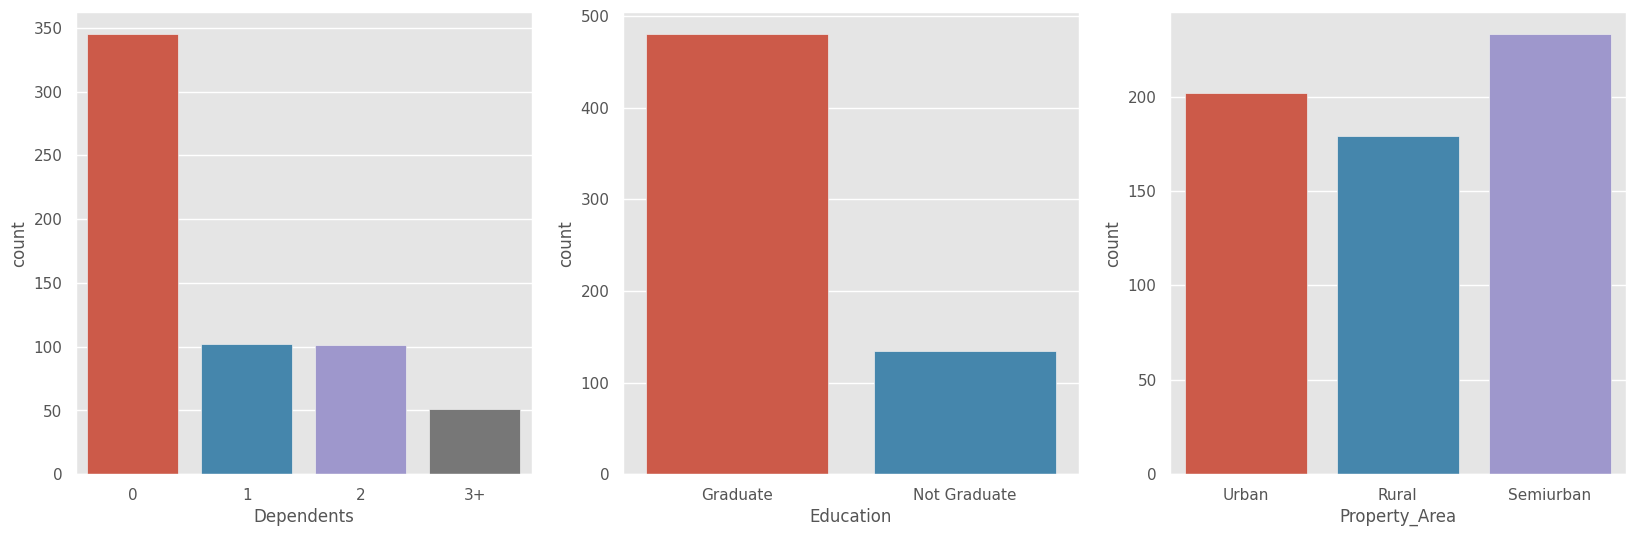

In [12]:

plt.figure(figsize=(20,6))
plt.figure(num=1)
plt.subplot(131)
sns.countplot(x='Dependents', data=data)
plt.subplot(132)
sns.countplot(x='Education', data=data)
plt.subplot(133)
sns.countplot(x='Property_Area', data=data)
plt.show()

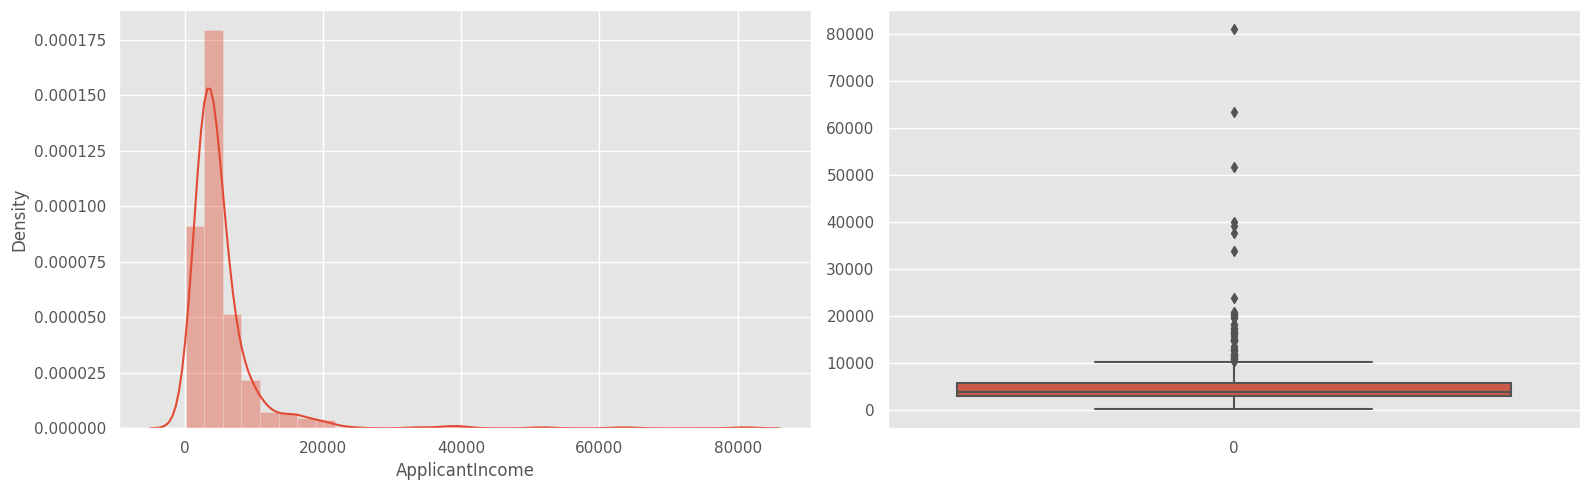

In [13]:
plt.figure(figsize=(16,5))
plt.subplot(121)
sns.distplot(data['ApplicantIncome'],bins=30)
plt.subplot(122)
sns.boxplot(data['ApplicantIncome'])
plt.tight_layout()
plt.show()

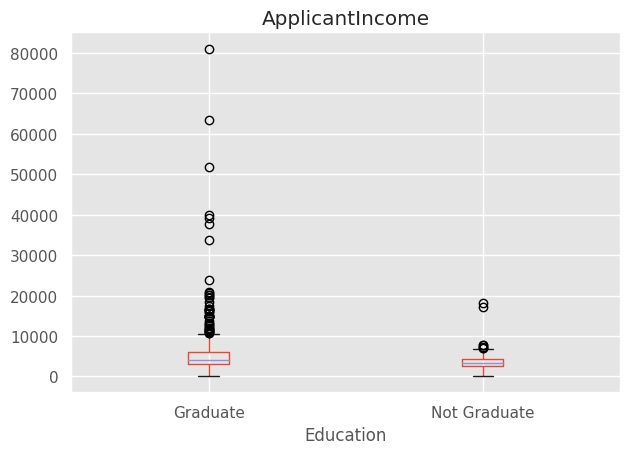

In [14]:

data.boxplot(column='ApplicantIncome', by='Education')
plt.suptitle('')
plt.tight_layout()

Text(0.5, 0.98, ' ')

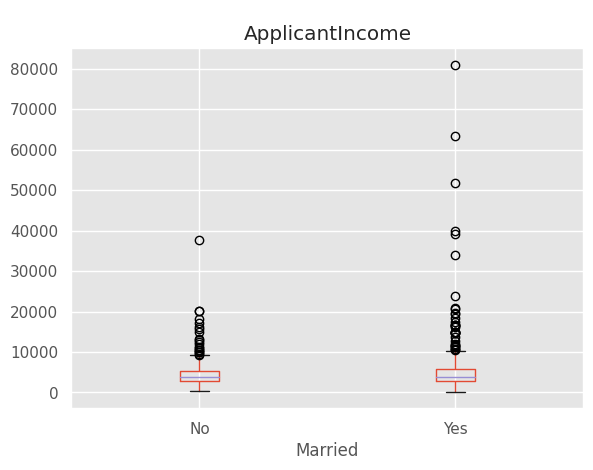

In [15]:
data.boxplot(column='ApplicantIncome', by='Married')
plt.suptitle(' ')

<Figure size 640x480 with 0 Axes>

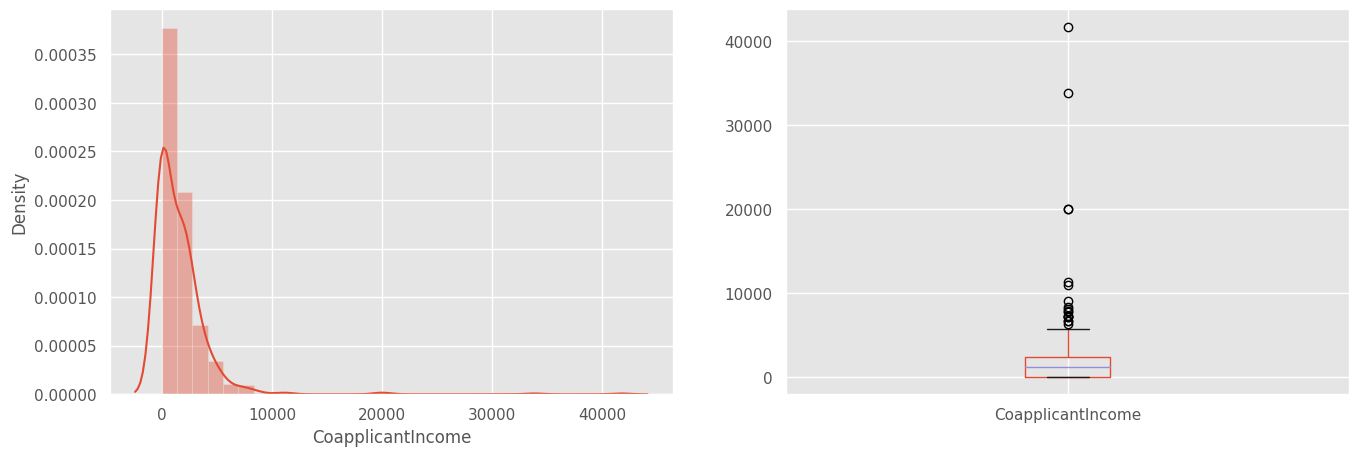

In [16]:
plt.figure(num=1)
plt.figure(figsize=(16,5))
plt.subplot(121)
sns.distplot(data['CoapplicantIncome'],bins=30)
plt.subplot(122)
data.boxplot(column='CoapplicantIncome')
plt.show()

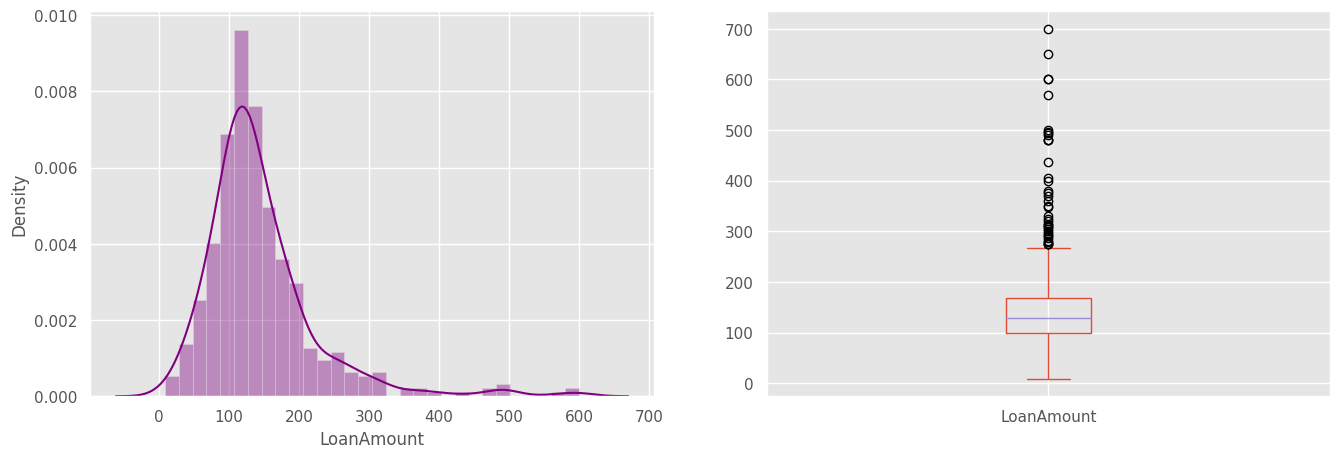

In [17]:
plt.figure(1)
plt.subplot(121)
# For better working it is necessary to drop null values
df = data.dropna()
sns.distplot(df['LoanAmount'],bins=30,color='purple')
plt.subplot(122)
data['LoanAmount'].plot.box(figsize=(16,5))
plt.show()

<Figure size 1800x1400 with 0 Axes>

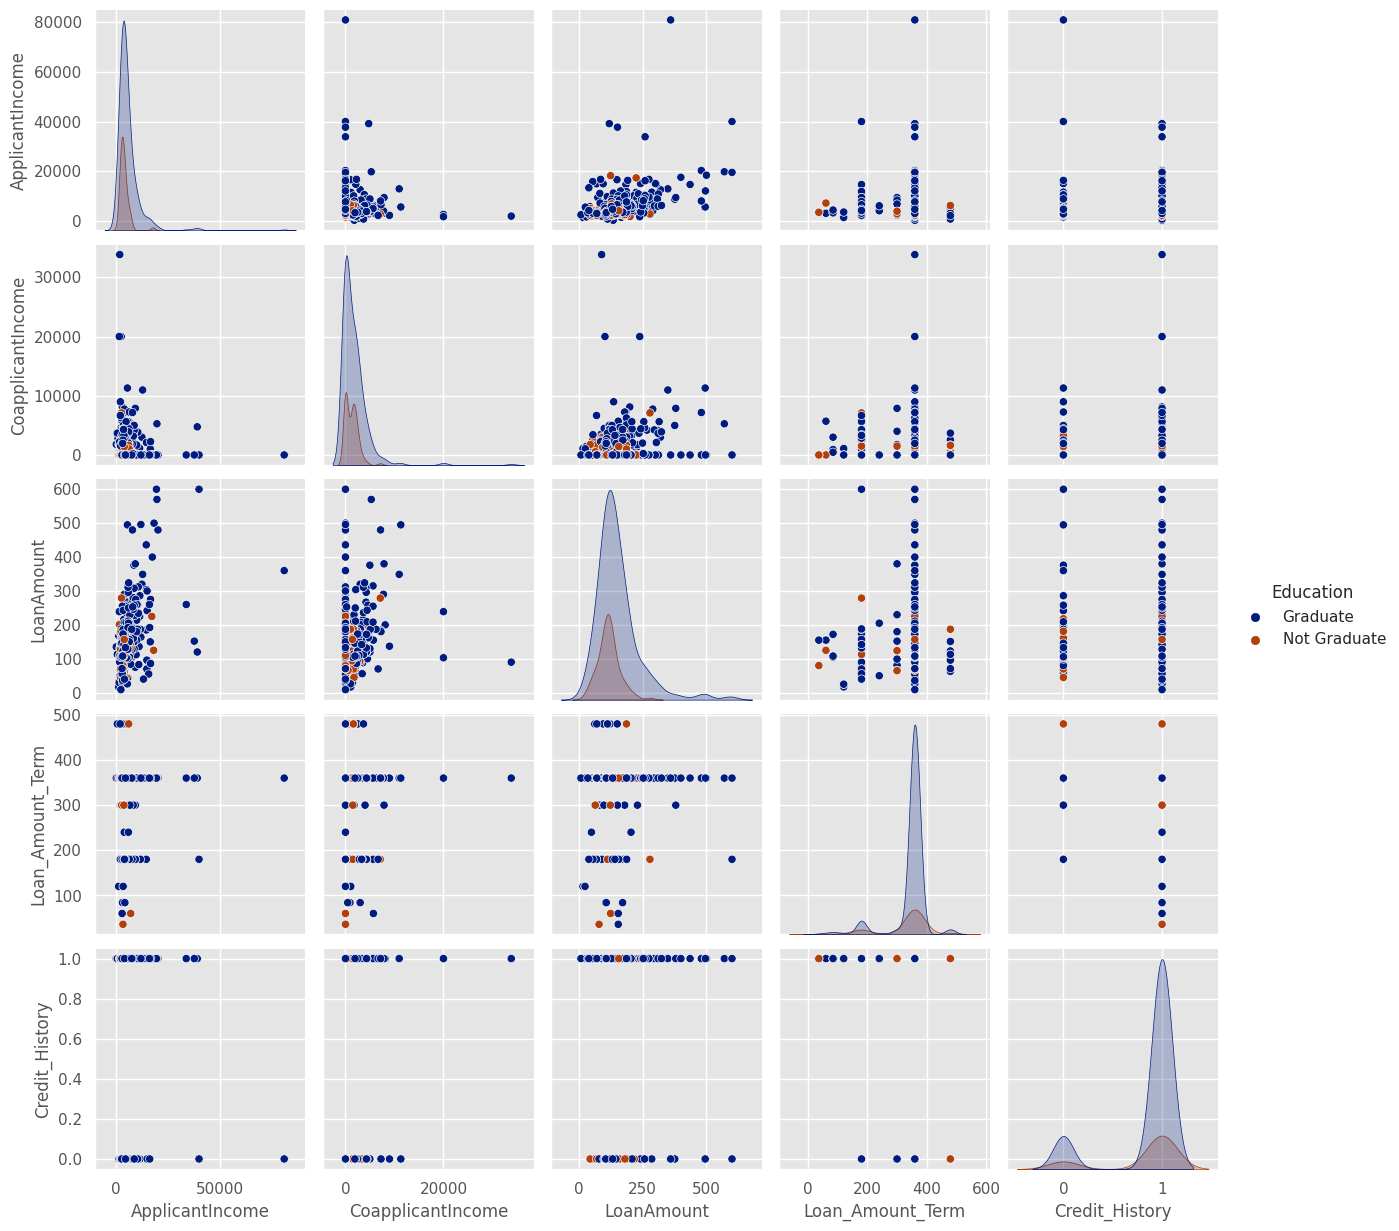

In [18]:
plt.figure(figsize=(18,14))
sns.pairplot(df,hue='Education', palette='dark')

In [19]:
Gender = pd.crosstab(index=data['Gender'],columns=data['Loan_Status'])
Gender

Loan_Status,N,Y
Gender,,
Female,37,75
Male,150,339


In [20]:
Gender.sum(1).astype(float)

Gender
Female    112.0
Male      489.0
dtype: float64

In [21]:
female_Y = round((75/112)*100,2)
print("Percentage of Female applicants whose application is approved: {}%".format(female_Y))

Percentage of Female applicants whose application is approved: 66.96%


In [22]:
male_Y = round((339/489)*100,2)
print("Percentage of Male applicants whose application is approved: {}%".format(male_Y))

Percentage of Male applicants whose application is approved: 69.33%


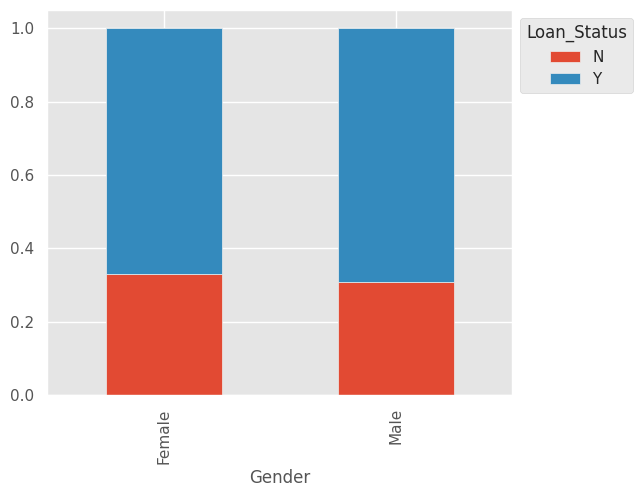

In [23]:
Gender.div(Gender.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True, figsize=(6,5))
plt.legend(loc = 'upper left',bbox_to_anchor= (1,1),title='Loan_Status')
plt.show()

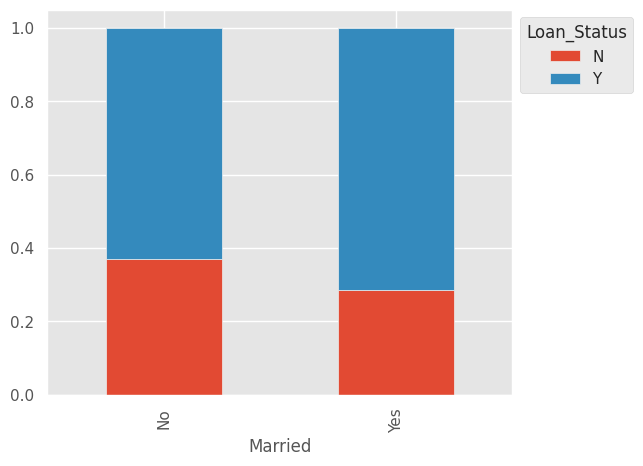

In [24]:
Married=pd.crosstab(data['Married'], data['Loan_Status'])
Married.div(Married.sum(1).astype(float), axis=0).plot(kind='bar',stacked=True,figsize=(6,5))
plt.legend(bbox_to_anchor=(1,1),loc='upper left', title='Loan_Status')
plt.show()

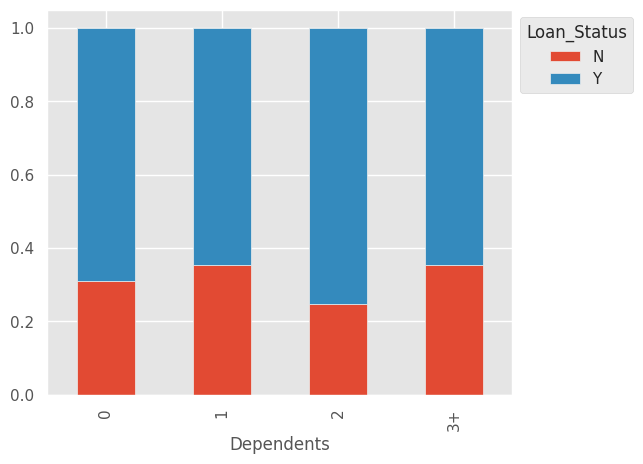

In [25]:
Dependents=pd.crosstab(data['Dependents'], data['Loan_Status'])
Dependents.div(Dependents.sum(1).astype(float), axis=0).plot(kind='bar',stacked=True,figsize=(6,5))
plt.legend(bbox_to_anchor=(1,1),loc='upper left', title='Loan_Status')
plt.show()

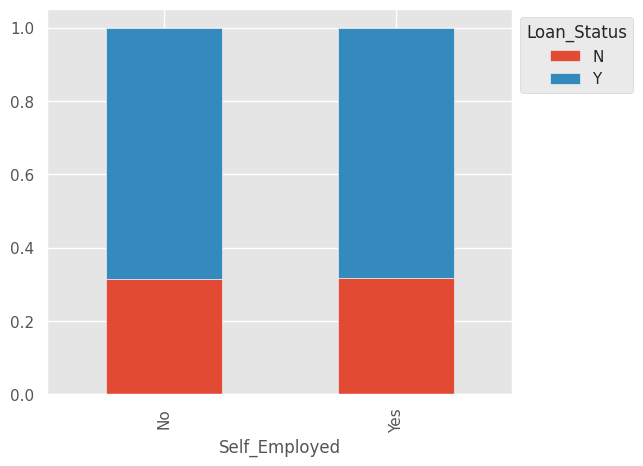

In [26]:
Self_Employed = pd.crosstab(data['Self_Employed'], data['Loan_Status'])
Self_Employed.div(Self_Employed.sum(1).astype(float),axis=0).plot(kind='bar', stacked=True, figsize=(6,5))
plt.legend(bbox_to_anchor=(1,1),loc='upper left',title='Loan_Status')
plt.show()

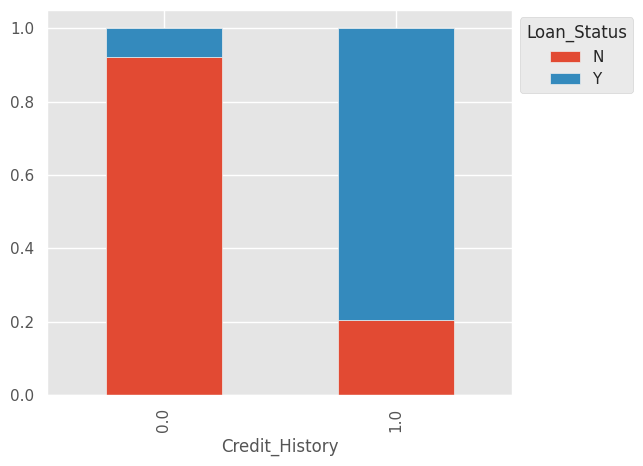

In [27]:
Credit_History = pd.crosstab(data['Credit_History'], data['Loan_Status'])
Credit_History.div(Credit_History.sum(1).astype(float),axis=0).plot(kind='bar',stacked=True,figsize=(6,5))
plt.legend(bbox_to_anchor=(1,1),loc='upper left',title='Loan_Status')
plt.show()

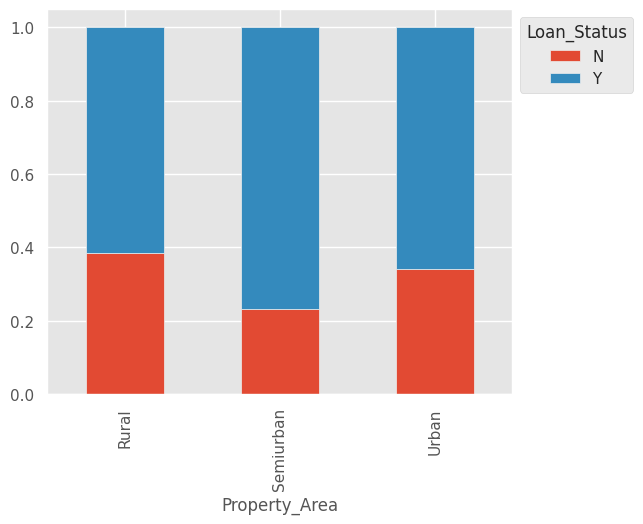

In [28]:
Property_Area = pd.crosstab(data['Property_Area'], data['Loan_Status'])
Property_Area.div(Property_Area.sum(1).astype(float),axis=0).plot(kind='bar',stacked=True, figsize=(6,5))
plt.legend(bbox_to_anchor=(1,1),loc='upper left', title='Loan_Status')
plt.show()

In [29]:
data.groupby('Loan_Status').mean()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
Loan_Status,,,,,
N,5446.078125,1877.807292,151.220994,344.064516,0.541899
Y,5384.068720,1504.516398,144.294404,341.072464,0.981818


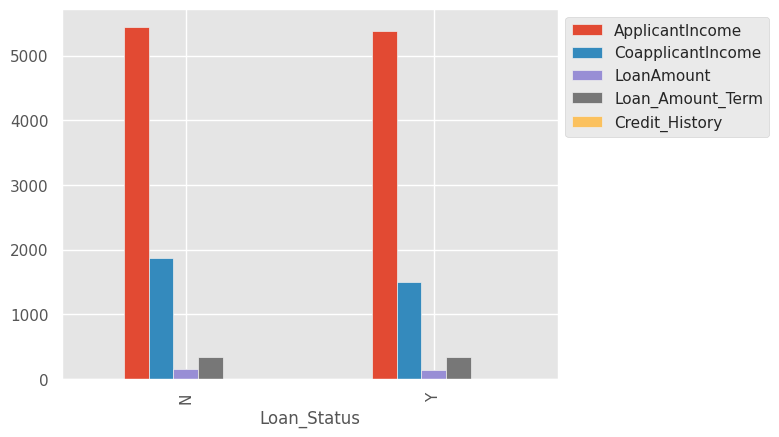

In [30]:
data.groupby('Loan_Status').mean().plot.bar()
plt.legend(bbox_to_anchor=(1,1),loc='upper left')

In [31]:
data.groupby('Loan_Status')['ApplicantIncome'].mean()

Loan_Status
N    5446.078125
Y    5384.068720
Name: ApplicantIncome, dtype: float64

In [32]:
bins = [0,2500,4000,6000,8100]
groups = ['Low', 'Average', 'High', 'Very High']


In [33]:
df.head(3) # dataframe without nan values
df.isna().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [34]:
data['Income_groups'] = pd.cut(df['ApplicantIncome'],bins=bins,labels=groups)

In [35]:
data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Income_groups
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y,NaN
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N,High
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y,Average
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y,Average
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y,High


In [36]:
data['Income_groups'].value_counts()

Average      174
High         111
Low           83
Very High     44
Name: Income_groups, dtype: int64

In [37]:
data[['ApplicantIncome', 'Income_groups', 'Loan_Status']].head(n=4)

,ApplicantIncome,Income_groups,Loan_Status
0,5849,NaN,Y
1,4583,High,N
2,3000,Average,Y
3,2583,Average,Y


In [38]:
# Pandas Crosstab function drops the NaN values by default
Income_groups = pd.crosstab(index=data['Income_groups'],columns=data['Loan_Status'])
Income_groups

Loan_Status,N,Y
Income_groups,,
Low,26,57
Average,51,123
High,32,79
Very High,15,29


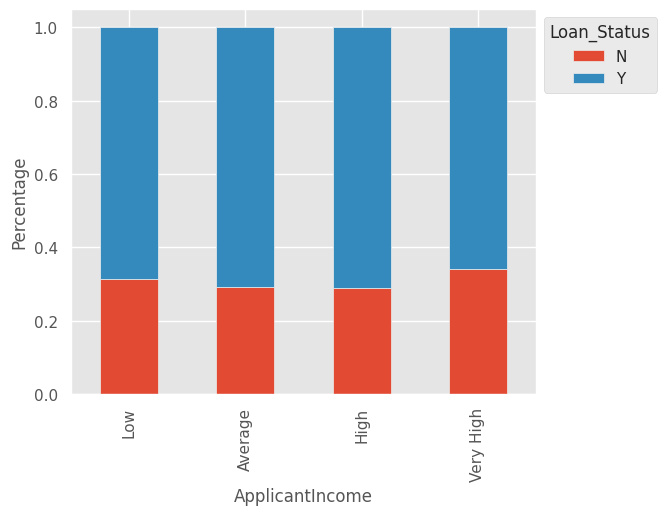

In [39]:
Income_groups.div(Income_groups.sum(1).astype(float), axis=0).plot(kind='bar',stacked=True, figsize=(6,5))
plt.xlabel('ApplicantIncome')
plt.ylabel('Percentage')
plt.legend(loc='upper left', bbox_to_anchor=(1,1),title='Loan_Status')
plt.show()

In [40]:
bins = [0,1000,3000,4200]
groups = ['Low', 'Average', 'High']
data['coapplicant_income_groups'] = pd.cut(df['CoapplicantIncome'],bins,labels=groups)
data['coapplicant_income_groups'].value_counts()

Average    169
High        37
Low         18
Name: coapplicant_income_groups, dtype: int64

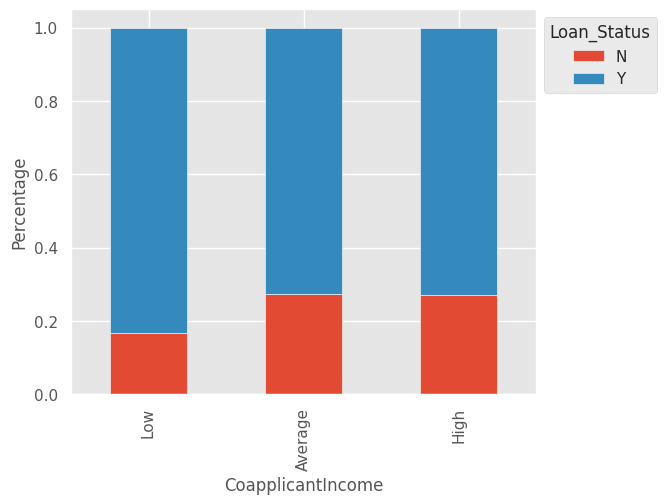

In [41]:
Coapplicant_income_groups = pd.crosstab(index=data['coapplicant_income_groups'],columns=data['Loan_Status'])
Coapplicant_income_groups.div(Coapplicant_income_groups.sum(1).astype(float),axis=0).plot(kind='bar',stacked=True,figsize=(6,5))
plt.xlabel('CoapplicantIncome')
plt.ylabel('Percentage')
plt.legend(loc='upper left',bbox_to_anchor=(1,1),title='Loan_Status')
plt.show()

In [42]:
data['Total_Income'] = data['ApplicantIncome'] + data['CoapplicantIncome']

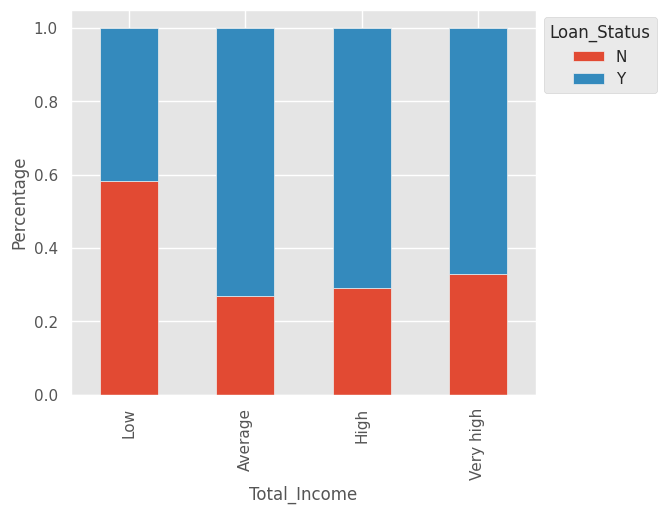

In [43]:
bins=[0,2500,4000,6000,81000]
group=['Low','Average','High','Very high']
data['Total_Income_groups']=pd.cut(data['Total_Income'],bins,labels=group)
Total_Income_groups=pd.crosstab(index=data['Total_Income_groups'],columns=data['Loan_Status'])
Total_Income_groups.div(Total_Income_groups.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True,figsize=(6,5))
plt.xlabel('Total_Income') 
P = plt.ylabel('Percentage')
plt.legend(loc='upper left',bbox_to_anchor=(1,1),title='Loan_Status')
plt.show()

In [44]:
data['LoanAmount'].isnull().sum()

22

In [45]:
data['LoanAmount'].describe()

count    592.000000
mean     146.412162
std       85.587325
min        9.000000
25%      100.000000
50%      128.000000
75%      168.000000
max      700.000000
Name: LoanAmount, dtype: float64

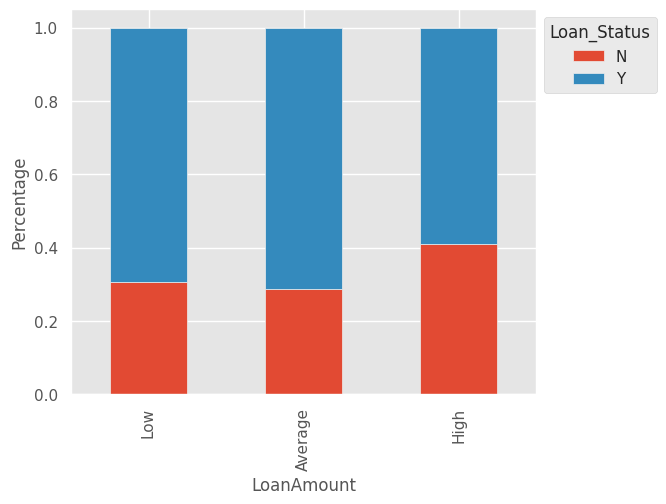

In [46]:
bins=[0,100,200,700]
groups=['Low','Average','High']
data['LoanAmount_groups'] = pd.cut(x=df['LoanAmount'],bins=bins,labels=groups)
LoanAmount_groups = pd.crosstab(index=data['LoanAmount_groups'],columns=data['Loan_Status'])
LoanAmount_groups.div(LoanAmount_groups.sum(1).astype(float),axis=0).plot(kind='bar',stacked=True,figsize=(6,5))
plt.legend(loc='upper left',bbox_to_anchor=(1,1),title='Loan_Status')
plt.xlabel('LoanAmount')
p=plt.ylabel('Percentage')
plt.show()

In [47]:
data.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status',
       'Income_groups', 'coapplicant_income_groups', 'Total_Income',
       'Total_Income_groups', 'LoanAmount_groups'],
      dtype='object')

In [48]:
data = data.drop(labels=['Income_groups', 'coapplicant_income_groups','Total_Income','Total_Income_groups','LoanAmount_groups'],axis=1)

In [49]:
data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [50]:
data['Dependents'].value_counts()

0     345
1     102
2     101
3+     51
Name: Dependents, dtype: int64

In [51]:
data['Dependents'].value_counts()

0     345
1     102
2     101
3+     51
Name: Dependents, dtype: int64

In [52]:
data['Loan_Status'].replace('N',0,inplace=True)
data['Loan_Status'].replace('Y',1,inplace=True)

In [53]:
data['Loan_Status'].value_counts()

1    422
0    192
Name: Loan_Status, dtype: int64

In [54]:
data.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status            int64
dtype: object

In [55]:
data.corr()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status
ApplicantIncome,1.000000,-0.116605,0.570909,-0.045306,-0.014715,-0.004710
CoapplicantIncome,-0.116605,1.000000,0.188619,-0.059878,-0.002056,-0.059187
LoanAmount,0.570909,0.188619,1.000000,0.039447,-0.008433,-0.037318
Loan_Amount_Term,-0.045306,-0.059878,0.039447,1.000000,0.001470,-0.021268
Credit_History,-0.014715,-0.002056,-0.008433,0.001470,1.000000,0.561678
Loan_Status,-0.004710,-0.059187,-0.037318,-0.021268,0.561678,1.000000


<Axes: >

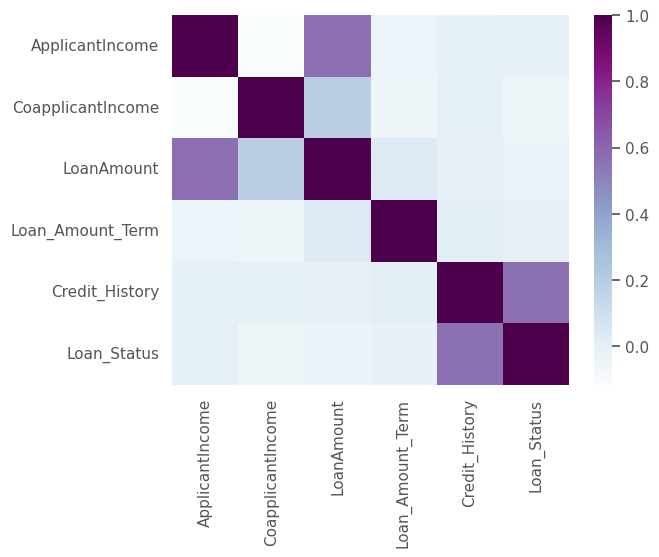

In [56]:
sns.heatmap(data=data.corr(), square=False,cmap='BuPu')

In [57]:
data.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [58]:
data.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status            int64
dtype: object

In [59]:
data['Gender'].describe()

count      601
unique       2
top       Male
freq       489
Name: Gender, dtype: object

In [60]:
data['Gender'].mode()

0    Male
Name: Gender, dtype: object

In [61]:
data['Gender'].mode()[0]

'Male'

In [62]:
data['Gender'].fillna(value=data['Gender'].mode()[0],inplace=True)

In [63]:
data['Gender'].isnull().sum()

0

In [64]:
# check the value_counts and unique count
data['Gender'].describe()

count      614
unique       2
top       Male
freq       502
Name: Gender, dtype: object

In [65]:
data['Married'].fillna(data['Married'].mode()[0],inplace= True)
data['Dependents'].fillna(data['Dependents'].mode()[0],inplace= True)
data['Self_Employed'].fillna(data['Self_Employed'].mode()[0],inplace= True)

In [66]:
data['Credit_History'].value_counts()

1.0    475
0.0     89
Name: Credit_History, dtype: int64

In [67]:
data['Credit_History'].mode()[0]

1.0

In [68]:
data['Credit_History'].fillna(data['Credit_History'].mode()[0],inplace=True)

In [69]:
data.isna().sum()

Loan_ID               0
Gender                0
Married               0
Dependents            0
Education             0
Self_Employed         0
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History        0
Property_Area         0
Loan_Status           0
dtype: int64

In [70]:
data['Loan_Amount_Term'].value_counts()

360.0    512
180.0     44
480.0     15
300.0     13
240.0      4
84.0       4
120.0      3
60.0       2
36.0       2
12.0       1
Name: Loan_Amount_Term, dtype: int64

In [71]:
data['Loan_Amount_Term'].fillna(data['Loan_Amount_Term'].mode()[0],inplace=True)

In [72]:
data['LoanAmount'].value_counts()

120.0    20
110.0    17
100.0    15
160.0    12
187.0    12
         ..
240.0     1
214.0     1
59.0      1
166.0     1
253.0     1
Name: LoanAmount, Length: 203, dtype: int64

In [73]:
data['LoanAmount'].median()

128.0

In [74]:
data['LoanAmount'].fillna(data['LoanAmount'].median(),inplace=True)

In [75]:
data.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [77]:

test_data = pd.read_csv('/content/train_u6lujuX_CVtuZ9i (1).csv')

In [78]:
# Quick overview of the data (we made a function for that)
data_feature(test_data)

SHAPE OF THE DATA: 
(614, 13)
------------------------------------------------------------------------------------------
INFORMATION OF THE DATA: 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1)

In [79]:
test_data['Dependents'].replace('3+',3,inplace=True)
test_data['Gender'].fillna(data['Gender'].mode()[0],inplace=True)
test_data['Dependents'].fillna(data['Dependents'].mode()[0],inplace=True)
test_data['Self_Employed'].fillna(data['Self_Employed'].mode()[0],inplace=True)
test_data['Credit_History'].fillna(data['Credit_History'].mode()[0],inplace=True)
test_data['Loan_Amount_Term'].fillna(data['Loan_Amount_Term'].mode()[0],inplace=True)
test_data['LoanAmount'].fillna(data['LoanAmount'].mode()[0],inplace=True)

In [80]:
test_data.isnull().sum()

Loan_ID              0
Gender               0
Married              3
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [81]:
print("10th percentile: ")
print(data['LoanAmount'].quantile(0.10))
print("90th percentile: ")
print(data['LoanAmount'].quantile(0.90))

10th percentile: 
72.30000000000001
90th percentile: 
229.4000000000001


After removing outliers >90th percentile: :
Detecting Outilers:
 


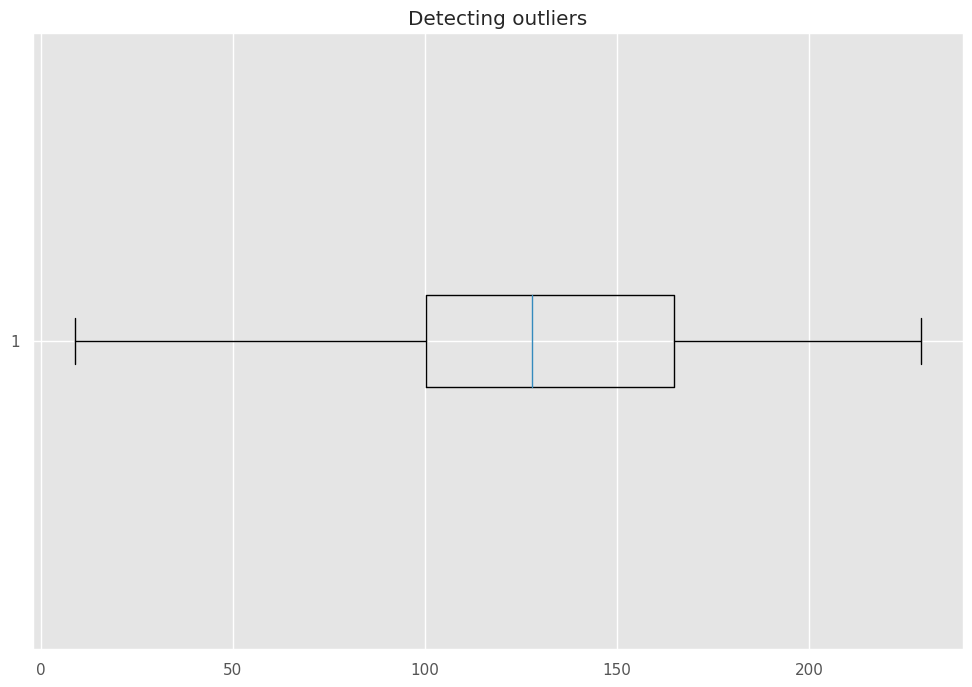

In [82]:
data['LoanAmount'] = np.where(data['LoanAmount']>229.0, 229.0, data['LoanAmount'])

def box_plot(df):
    print("Detecting Outilers:\n ")
    plt.figure(figsize=(12,8))
    plt.boxplot(df, vert=False)
    plt.title("Detecting outliers")
    plt.show()

print("After removing outliers >90th percentile: :")
box_plot(data['LoanAmount']) 

<Axes: >

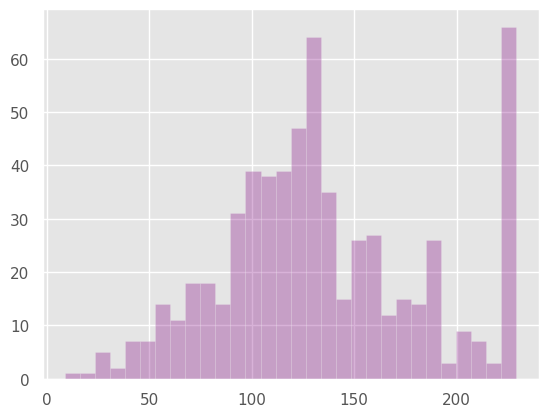

In [83]:
data['LoanAmount'].hist(bins=30, color='purple',alpha=0.3)

In [84]:
# Similar for test dataset
print("10th percentile: ")
print(test_data['LoanAmount'].quantile(0.10))
print("90th percentile: ")
print(test_data['LoanAmount'].quantile(0.90))

10th percentile: 
72.30000000000001
90th percentile: 
229.4000000000001


After removing outliers >90th percentile: :
Detecting Outilers:
 


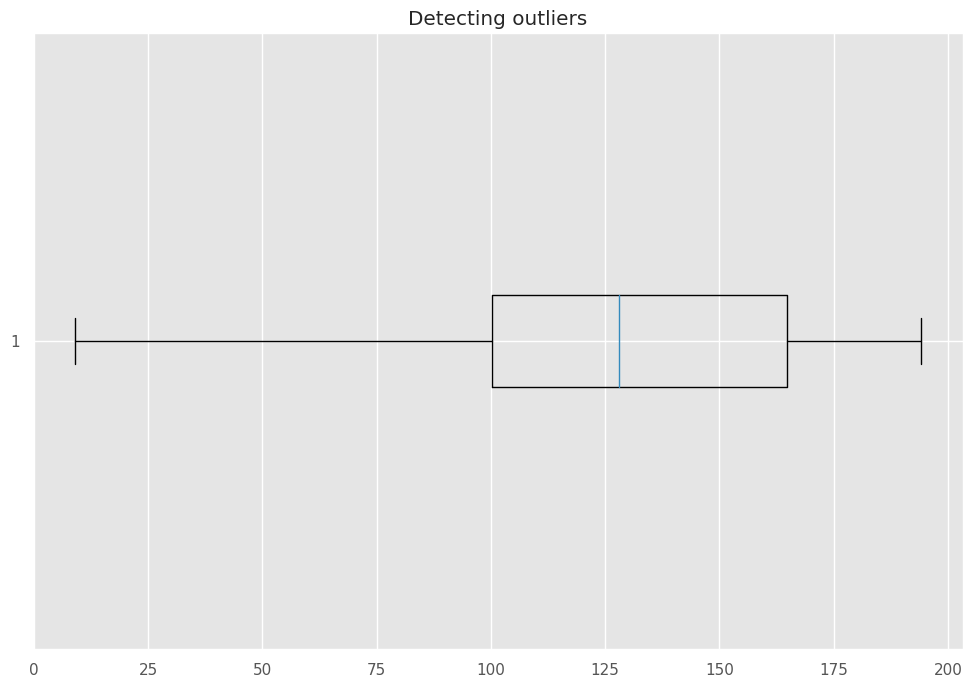

In [85]:
test_data['LoanAmount'] = np.where(test_data['LoanAmount']>194.0, 194.0, test_data['LoanAmount'])

print("After removing outliers >90th percentile: :")
box_plot(test_data['LoanAmount'])

<Axes: >

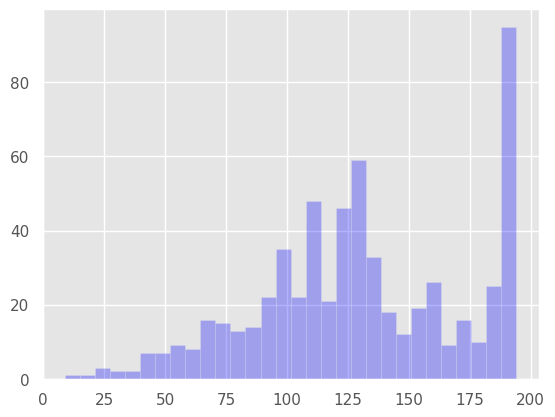

In [86]:
test_data['LoanAmount'].hist(bins=30, color='blue',alpha=0.3)

In [87]:
train = data.drop('Loan_ID',axis=1)
test = test_data.drop('Loan_ID',axis=1)

In [88]:
train.head(20)

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849,0.0,128.0,360.0,1.0,Urban,1
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,0
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,1
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,1
4,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,1
5,Male,Yes,2,Graduate,Yes,5417,4196.0,229.0,360.0,1.0,Urban,1
6,Male,Yes,0,Not Graduate,No,2333,1516.0,95.0,360.0,1.0,Urban,1
7,Male,Yes,3+,Graduate,No,3036,2504.0,158.0,360.0,0.0,Semiurban,0
8,Male,Yes,2,Graduate,No,4006,1526.0,168.0,360.0,1.0,Urban,1
9,Male,Yes,1,Graduate,No,12841,10968.0,229.0,360.0,1.0,Semiurban,0


In [89]:
print(train.isnull().sum())
print("-"*60)
print(train.dtypes)

Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64
------------------------------------------------------------
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status            int64
dtype: object


In [90]:
# Gender
train['Gender'] = train['Gender'].map({"Male":1, "Female":0})
test['Gender'] = test['Gender'].map({"Male":1, "Female":0})
# Marrital Status
train['Married'] = train['Married'].map({'Yes':1, 'No':0})
test['Married'] = test['Married'].map({'Yes':1, 'No':0})
# Dependents
train['Dependents'] = train['Dependents'].map({'0':0,'1':1,'2':2,'3+':3})
test['Dependents'] = test['Dependents'].map({'0':0,'1':1,'2':2,'3+':3})
# Education Status
train['Education'] = train['Education'].map({'Graduate':1, 'Not Graduate':0})
test['Education'] = test['Education'].map({'Graduate':1, 'Not Graduate':0})
# Employment Status
train['Self_Employed'] = train['Self_Employed'].map({'Yes':1, 'No':0})
test['Self_Employed'] = test['Self_Employed'].map({'Yes':1, 'No':0})
#Property Area
train['Property_Area'] = train['Property_Area'].map({'Urban':2, 'Rural':0,'Semiurban':1})
test['Property_Area'] = test['Property_Area'].map({'Urban':2, 'Rural':0,'Semiurban':1})

In [91]:
train.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1,0,0,1,0,5849,0.0,128.0,360.0,1.0,2,1
1,1,1,1,1,0,4583,1508.0,128.0,360.0,1.0,0,0
2,1,1,0,1,1,3000,0.0,66.0,360.0,1.0,2,1
3,1,1,0,0,0,2583,2358.0,120.0,360.0,1.0,2,1
4,1,0,0,1,0,6000,0.0,141.0,360.0,1.0,2,1


In [92]:
print(train.isnull().sum())
print("-"*60)
print(train.dtypes)
print("-"*60)
print(train['Dependents'].value_counts())

Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64
------------------------------------------------------------
Gender                 int64
Married                int64
Dependents             int64
Education              int64
Self_Employed          int64
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area          int64
Loan_Status            int64
dtype: object
------------------------------------------------------------
0    360
1    102
2    101
3     51
Name: Dependents, dtype: int64


In [93]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
# train['Dependents'] = le.fit_transform(train['Dependents'])
train.isnull().sum()

Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [94]:
# Independent Variable
X = train.drop('Loan_Status',axis=1)

# Dependent Variable(target)
y= train.Loan_Status

In [95]:
X

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,1,0,0,1,0,5849,0.0,128.0,360.0,1.0,2
1,1,1,1,1,0,4583,1508.0,128.0,360.0,1.0,0
2,1,1,0,1,1,3000,0.0,66.0,360.0,1.0,2
3,1,1,0,0,0,2583,2358.0,120.0,360.0,1.0,2
4,1,0,0,1,0,6000,0.0,141.0,360.0,1.0,2
...,...,...,...,...,...,...,...,...,...,...,...
609,0,0,0,1,0,2900,0.0,71.0,360.0,1.0,0
610,1,1,3,1,0,4106,0.0,40.0,180.0,1.0,0
611,1,1,1,1,0,8072,240.0,229.0,360.0,1.0,2
612,1,1,2,1,0,7583,0.0,187.0,360.0,1.0,2


In [96]:
y

0      1
1      0
2      1
3      1
4      1
      ..
609    1
610    1
611    1
612    1
613    0
Name: Loan_Status, Length: 614, dtype: int64

In [97]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.25, random_state=0)

In [98]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((460, 11), (154, 11), (460,), (154,))

In [99]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

In [100]:
from sklearn.model_selection import cross_val_score

# Logistic Regression
log_reg =  LogisticRegression(solver='liblinear')
log_reg.fit(X_train, y_train)
log_score = cross_val_score(log_reg, X_train, y_train,cv=5)
print("Logistic Regression: ", round(log_score.mean(),2)*100, "% accuracy score")

# Support Vector Machine
svc = SVC()
svc.fit(X_train, y_train)
svc_score = cross_val_score(svc, X_train, y_train,cv=5)
print("Support Vector Machine: ", round(svc_score.mean(),2)*100, "% accuracy score")

# KNeighbors
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
knn_score = cross_val_score(knn, X_train, y_train,cv=5)
print("KNeighbors: ", round(knn_score.mean(),2)*100, "% accuracy score")

# Decision Tree
dcTree = DecisionTreeClassifier()
dcTree.fit(X_train, y_train)
dcTree_score = cross_val_score(dcTree, X_train, y_train, cv=5)
print("Decision Tree: ", round(dcTree_score.mean(),2)*100, "% accuracy score")

# Random Forest
rf = RandomForestClassifier()
rf.fit(X_train, y_train)
rf_score = cross_val_score(rf, X_train, y_train, cv=5)
print("Random Forest: ",  round(rf_score.mean(),2)*100, "% accuracy score")

Logistic Regression:  80.0 % accuracy score
Support Vector Machine:  67.0 % accuracy score
KNeighbors:  65.0 % accuracy score
Decision Tree:  69.0 % accuracy score
Random Forest:  78.0 % accuracy score


In [101]:
from sklearn.model_selection import GridSearchCV

log_reg_params = {"penalty":['l1','l2'], 'C':[0.001, 0.01, 0.1,1,10,100],'solver':['liblinear']}
grid_log_reg = GridSearchCV(LogisticRegression(),log_reg_params)
grid_log_reg.fit(X_train, y_train)

# Best parameters
log_reg = grid_log_reg.best_params_

print(log_reg)

{'C': 10, 'penalty': 'l1', 'solver': 'liblinear'}


In [102]:
knn_params = {"n_neighbors":[1,3,5], 'algorithm':['auto']}
grid_knn = GridSearchCV(KNeighborsClassifier(),knn_params)
grid_knn.fit(X_train, y_train)
knn = grid_knn.best_params_
print(knn)

{'algorithm': 'auto', 'n_neighbors': 5}


In [103]:
# SVC
svc_params = {'C':[0.5,1], 'kernel':['rbf','sigmoid']}
grid_svc = GridSearchCV(SVC(), svc_params)
grid_svc.fit(X_train, y_train)
svc = grid_svc.best_params_
print(svc)

{'C': 0.5, 'kernel': 'rbf'}


In [104]:
# Decision Tree
tree_params = {'criterion':['gini','entropy'],"max_depth":[2,4,6],"min_samples_leaf":[5,7,9,]}
grid_tree = GridSearchCV(DecisionTreeClassifier(), tree_params)
grid_tree.fit(X_train, y_train)
dcTree = grid_tree.best_params_
print(dcTree)

{'criterion': 'gini', 'max_depth': 2, 'min_samples_leaf': 5}


In [105]:
# RandomForest
rf_params = {'n_estimators':[100,200,300],'max_features':['auto','sqrt'],"min_samples_leaf":[1,2,4],"bootstrap":[True, False]}
grid_rf = GridSearchCV(RandomForestClassifier(),rf_params)
grid_rf.fit(X_train, y_train)
rf = grid_rf.best_params_
print(rf)

{'bootstrap': True, 'max_features': 'auto', 'min_samples_leaf': 4, 'n_estimators': 200}


In [106]:
log_reg =  LogisticRegression(C=10, penalty= 'l1', solver= 'liblinear')
log_reg.fit(X_train, y_train)
log_score = cross_val_score(log_reg, X_train, y_train,cv=5)
print('Logistic Regression: ', round(log_score.mean(),2)*100, "% accuracy score")

# Support Vector Machine
svc = SVC(C= 0.5, kernel= 'rbf', probability=True)
svc.fit(X_train, y_train)
svc_score = cross_val_score(svc, X_train, y_train,cv=5)
print("Support Vector Machine: ", round(svc_score.mean(),2)*100, "% accuracy score")

# KNeighbors
knn = KNeighborsClassifier(algorithm= 'auto', n_neighbors= 5)
knn.fit(X_train, y_train)
knn_score = cross_val_score(knn, X_train, y_train,cv=5)
print("KNeighbors: ", round(knn_score.mean(),2)*100, "% accuracy score")

# Decision Tree
dcTree = DecisionTreeClassifier(criterion= 'gini', max_depth= 2, min_samples_leaf= 5)
dcTree.fit(X_train, y_train)
dcTree_score = cross_val_score(dcTree, X_train, y_train, cv=5)
print("Decision Tree: ", round(dcTree_score.mean(),2)*100, "% accuracy score")

# Random Forest
rf = RandomForestClassifier(bootstrap= True, max_features= 'sqrt', min_samples_leaf= 4, n_estimators= 100)
rf.fit(X_train, y_train)
rf_score = cross_val_score(rf, X_train, y_train, cv=5)
print("Random Forest: ",  round(rf_score.mean(),2)*100, "% accuracy score")

Logistic Regression:  80.0 % accuracy score
Support Vector Machine:  68.0 % accuracy score
KNeighbors:  65.0 % accuracy score
Decision Tree:  80.0 % accuracy score
Random Forest:  80.0 % accuracy score


ROC_AUC_SCORE of models on Train Set

Logistic Regression:  77
Support Vector Machine:  40
KNeighbors:  76
Decision Tree:  72
Random Forest:  97


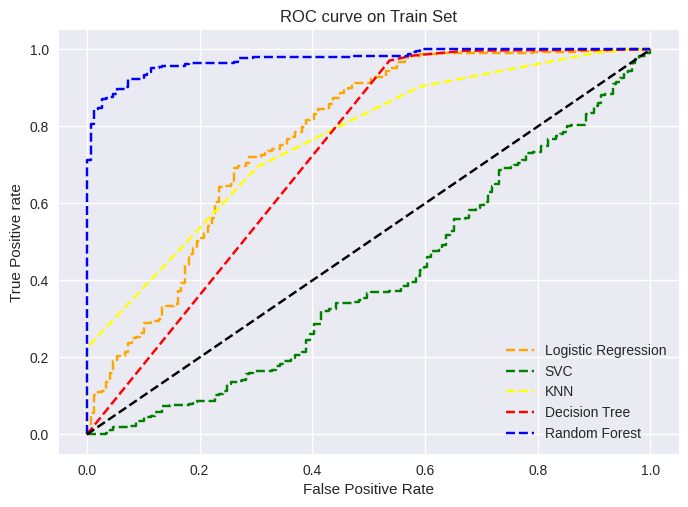

In [107]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

# predict probabilities
log_reg_proba = log_reg.predict_proba(X_train) 
svc_proba = svc.predict_proba(X_train)
knn_proba = knn.predict_proba(X_train)
dt_proba = dcTree.predict_proba(X_train)
rf_proba = rf.predict_proba(X_train)

# roc_auc_score
log_reg_auc = round(roc_auc_score(y_train, log_reg_proba[:,1])*100)
svc_auc = round(roc_auc_score(y_train,svc_proba[:,1])*100)
knn_auc = round(roc_auc_score(y_train, knn_proba[:,1])*100)
dt_auc =  round(roc_auc_score(y_train, dt_proba[:,1])*100)
rf_auc = round(roc_auc_score(y_train, rf_proba[:,1])*100)

print("ROC_AUC_SCORE of models on Train Set\n")
print("Logistic Regression: ", log_reg_auc)
print("Support Vector Machine: ", svc_auc)
print("KNeighbors: ",knn_auc)
print("Decision Tree: ",dt_auc)
print("Random Forest: ",rf_auc)


# roc curve for models

fpr1, tpr1, thresh1 = roc_curve(y_train, log_reg_proba[:,1],pos_label=1)
fpr2, tpr2, thresh2 = roc_curve(y_train, svc_proba[:,1],pos_label=1)
fpr3, tpr3, thresh3 = roc_curve(y_train, knn_proba[:,1],pos_label=1)
fpr4, tpr4, thresh4 = roc_curve(y_train, dt_proba[:,1],pos_label=1)
fpr5, tpr5, thresh5 = roc_curve(y_train, rf_proba[:,1],pos_label=1)

# roc curve for tpr = fpr 
random_probs = [0 for i in range(len(y_train))]
p_fpr, p_tpr, _ = roc_curve(y_train, random_probs, pos_label=1)

plt.style.use('seaborn')

# plot roc curves
plt.plot(fpr1, tpr1, linestyle='--',color='orange', label='Logistic Regression')
plt.plot(fpr2, tpr2, linestyle='--',color='green', label='SVC')
plt.plot(fpr3, tpr3, linestyle='--',color='yellow', label='KNN')
plt.plot(fpr4, tpr4, linestyle='--',color='red', label='Decision Tree')
plt.plot(fpr5, tpr5, linestyle='--',color='blue', label='Random Forest')
plt.plot(p_fpr, p_tpr, linestyle='--', color='black')
# title
plt.title('ROC curve on Train Set')
# x label
plt.xlabel('False Positive Rate')
# y label
plt.ylabel('True Positive rate')

plt.legend(loc='best')
# plt.savefig('ROC',dpi=300)
plt.show()

ROC_AUC_SCORE of models on Test Set

Logistic Regression:  74
KNeighbors:  51
Random Forest:  82


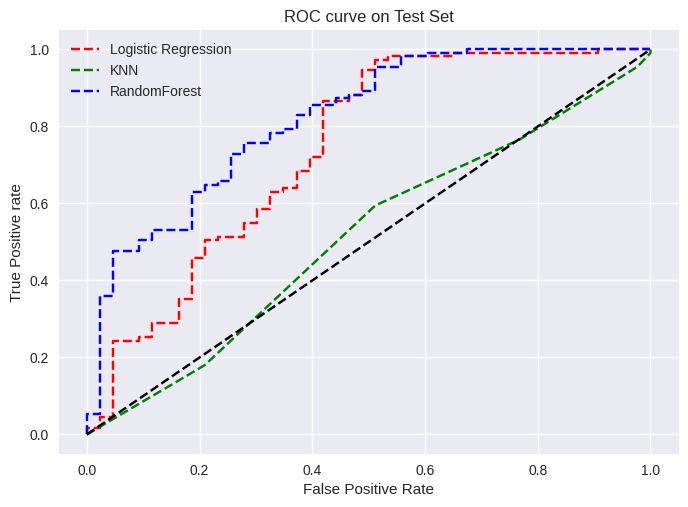

In [108]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

log_reg_proba_test = log_reg.predict_proba(X_test) 
knn_proba_test = knn.predict_proba(X_test)
rf_proba_test = rf.predict_proba(X_test)


knn_auc_test = round(roc_auc_score(y_test, knn_proba_test[:,1])*100)
log_reg_auc_test=  round(roc_auc_score(y_test, log_reg_proba_test[:,1])*100)
rf_auc_test = round(roc_auc_score(y_test, rf_proba_test[:,1])*100)

print("ROC_AUC_SCORE of models on Test Set\n")
print("Logistic Regression: ", log_reg_auc_test)
print("KNeighbors: ",knn_auc_test)
print("Random Forest: ", rf_auc_test)

fpr1, tpr1, thresh1 = roc_curve(y_test, log_reg_proba_test[:,1],pos_label=1)
fpr2, tpr2, thresh2 = roc_curve(y_test, knn_proba_test[:,1],pos_label=1)
fpr3, tpr3, thresh3 = roc_curve(y_test, rf_proba_test[:,1],pos_label=1)

# roc curve for tpr = fpr 
random_probs = [0 for i in range(len(y_test))]
p_fpr, p_tpr, _ = roc_curve(y_test, random_probs, pos_label=1)

plt.style.use('seaborn')

# plot roc curves
plt.plot(fpr1, tpr1, linestyle='--',color='red', label='Logistic Regression')
plt.plot(fpr2, tpr2, linestyle='--',color='green', label='KNN')
plt.plot(fpr3, tpr3, linestyle='--',color='blue', label='RandomForest')

plt.plot(p_fpr, p_tpr, linestyle='--', color='black')
# title
plt.title('ROC curve on Test Set')
# x label
plt.xlabel('False Positive Rate')
# y label
plt.ylabel('True Positive rate')

plt.legend(loc='best')
# plt.savefig('ROC',dpi=300)
plt.show()

In [109]:
log_reg_preds = log_reg.predict(X_test)
rf_preds = rf.predict(X_test)

print("Classification Report of Logisitic Regression: \n", classification_report(y_test, log_reg_preds))
print("-"*70)
print("Classification Report of Random Forest: \n", classification_report(y_test, rf_preds))

Classification Report of Logisitic Regression: 
               precision    recall  f1-score   support

           0       0.91      0.47      0.62        43
           1       0.83      0.98      0.90       111

    accuracy                           0.84       154
   macro avg       0.87      0.72      0.76       154
weighted avg       0.85      0.84      0.82       154

----------------------------------------------------------------------
Classification Report of Random Forest: 
               precision    recall  f1-score   support

           0       0.90      0.44      0.59        43
           1       0.82      0.98      0.89       111

    accuracy                           0.83       154
   macro avg       0.86      0.71      0.74       154
weighted avg       0.84      0.83      0.81       154



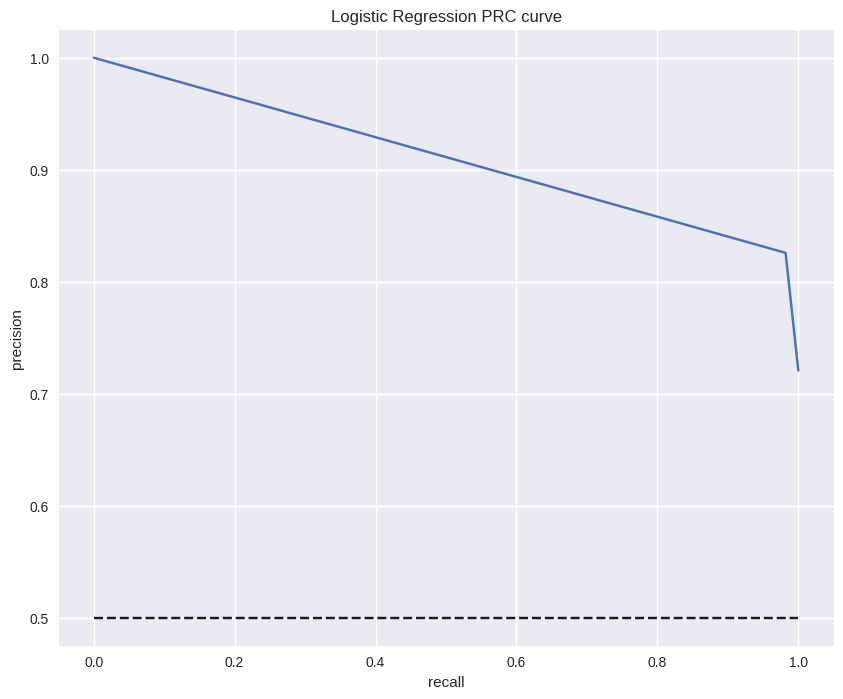

In [110]:
from sklearn.metrics import precision_recall_curve

precision1, recall1, thresholds1 = precision_recall_curve(y_test, log_reg_preds)
precision2, recall2, thresholds2 = precision_recall_curve(y_test, rf_preds)

plt.figure(figsize=(10,8))
plt.plot([0,1],[0.5,0.5],'k--')
plt.plot(recall1, precision1, label='Logistic Regression')
plt.xlabel('recall')
plt.ylabel('precision')
plt.title('Logistic Regression PRC curve')
plt.show()

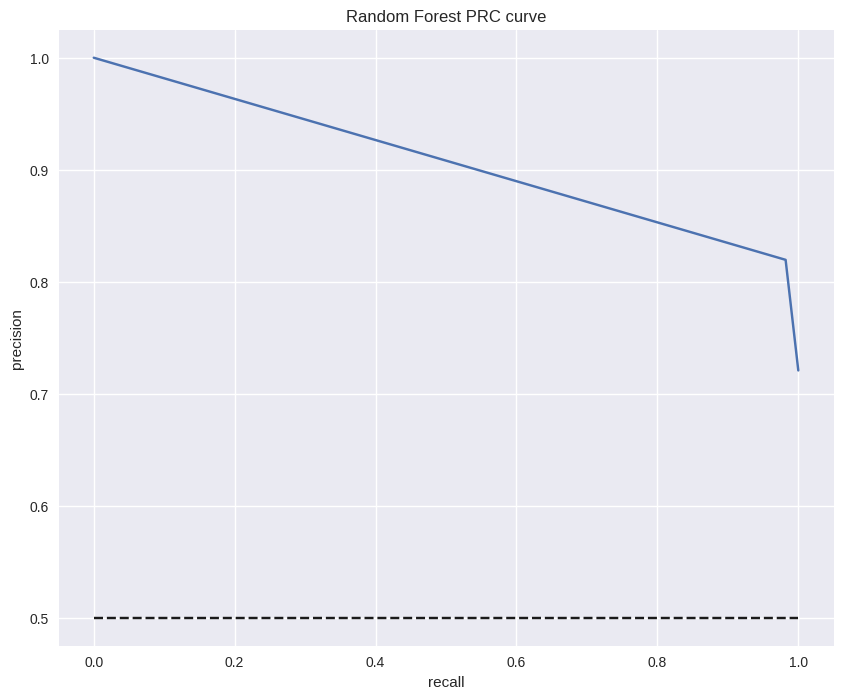

In [111]:
plt.figure(figsize=(10,8))
plt.plot([0,1],[0.5,0.5],'k--')
plt.plot(recall2, precision2, label='Random Forest')
plt.xlabel('recall')
plt.ylabel('precision')
plt.title('Random Forest PRC curve')
plt.show()

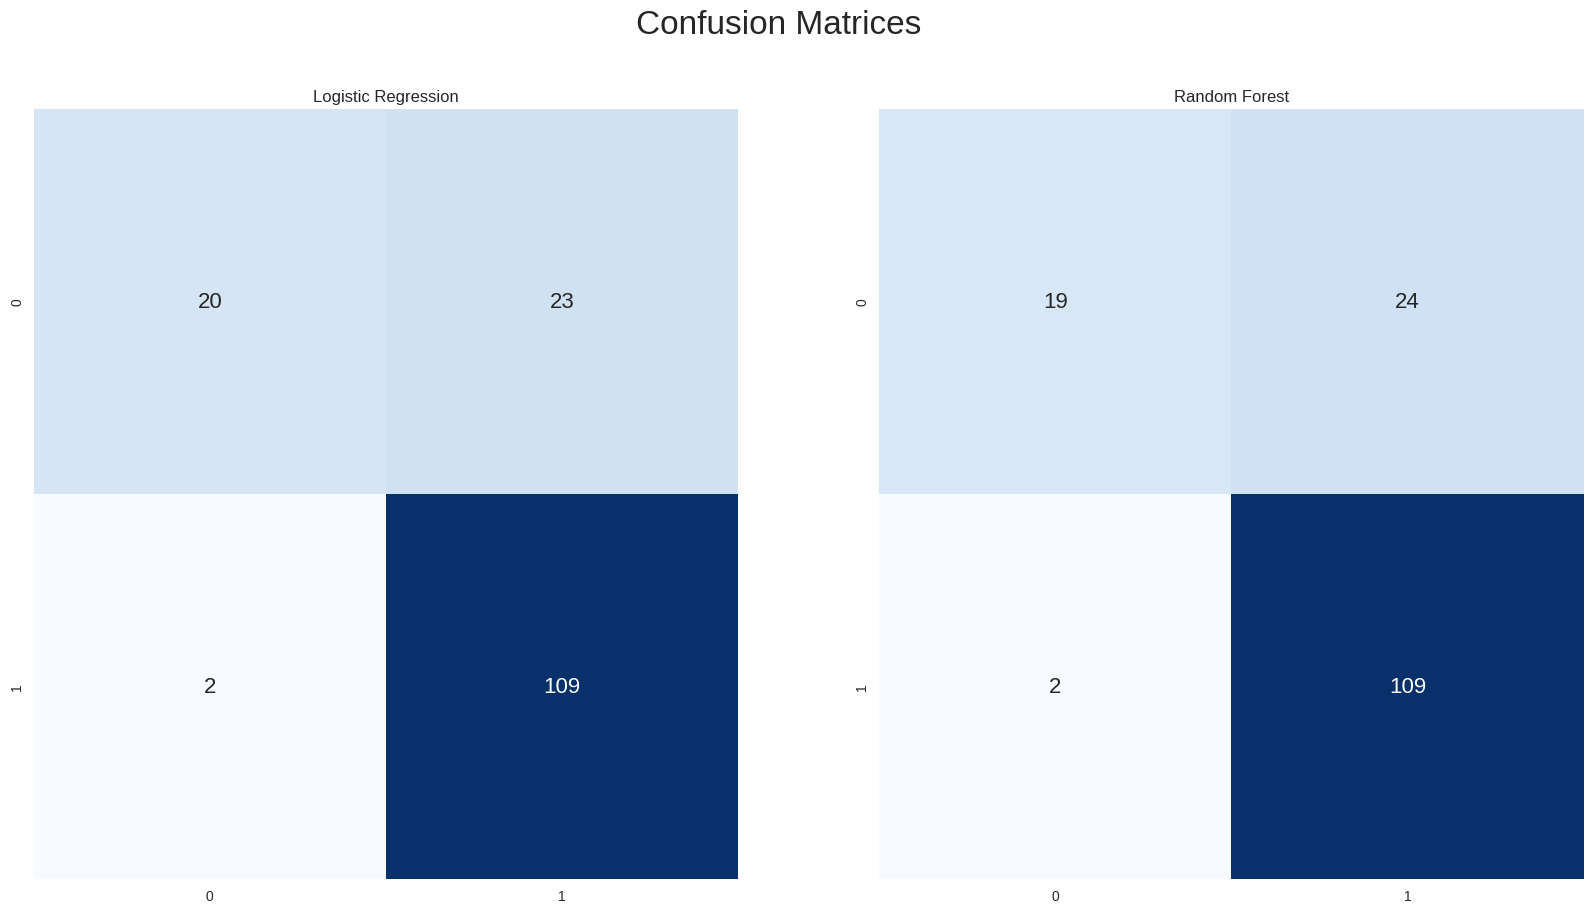

In [112]:
# confusion matrix
log_reg_cm = confusion_matrix(y_test, log_reg_preds)
rf_cm = confusion_matrix(y_test, rf_preds)

plt.figure(figsize=(20,10))
plt.suptitle("Confusion Matrices ", fontsize=24)

plt.subplot(1,2,1)
plt.title("Logistic Regression")
sns.heatmap(log_reg_cm,cbar=False, cmap="Blues", annot=True,annot_kws={'size':16},fmt='g')

plt.subplot(1,2,2)
plt.title("Random Forest")
sns.heatmap(rf_cm, cbar=False, cmap="Blues",annot=True, annot_kws={'size':16},fmt='g')

plt.show()

In [113]:
print("Logistic Regression's confusion matrix evaluation: ")
pd.crosstab(y_test, log_reg_preds, rownames=['Actual'],colnames=['Predicted'], margins=True)

Logistic Regression's confusion matrix evaluation: 


Predicted,0,1,All
Actual,,,
0,20,23,43
1,2,109,111
All,22,132,154


In [114]:
import pickle
file = 'log_reg.pkl'
pickle.dump(log_reg, open('log_reg.pkl', 'wb'))
# Testing the model

model = open('log_reg.pkl','rb')
model_test = pickle.load(model)

log_reg_test = model_test.score(X_test, y_test)
print(log_reg_test)

0.8376623376623377
